Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [89]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [90]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

Defaulting to user installation because normal site-packages is not writeable


In [91]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [92]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)

In [93]:

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 6s 9ms/step - loss: 0.4853 - accuracy: 0.8602 - val_loss: 0.2647 - val_accuracy: 0.9228
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2273 - accuracy: 0.9336 - val_loss: 0.2023 - val_accuracy: 0.9399
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1757 - accuracy: 0.9490 - val_loss: 0.1592 - val_accuracy: 0.9517
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1444 - accuracy: 0.9574 - val_loss: 0.1448 - val_accuracy: 0.9584
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1226 - accuracy: 0.9637 - val_loss: 0.1171 - val_accuracy: 0.9646
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1072 - accuracy: 0.9688 - val_loss: 0.1125 - val_accuracy: 0.9664
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0944 - accuracy: 0.9722 - val_loss: 0.1081 - val_accuracy: 0.9660
Epoch 

In [94]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_32 (Flatten)        (None, 784)               0         
                                                                 
 dense_96 (Dense)            (None, 64)                50240     
                                                                 
 dense_97 (Dense)            (None, 64)                4160      
                                                                 
 dense_98 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


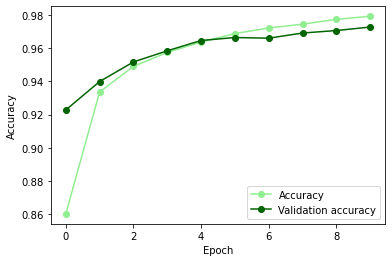

In [95]:
plt.plot(fit_info.history["accuracy"], '-o', color = "lightgreen")
plt.plot(fit_info.history["val_accuracy"], '-o', color = "darkgreen")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy','Validation accuracy'])
plt.show()

In [96]:
from datetime import datetime
start_time = datetime.now()

batch_size = 128
num_classes = 10
epochs = 40
factors = [0.000001,0.00025,0.00050,0.00075,0.0010]
scores = []

# Defining model
model = Sequential()

# Iterate over different factors
for i in range(5):
        #3 replicates per regularization factor
        for j in range(3):

                model.add(Flatten())
                model.add(Dense(500, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(factors[i])))
                model.add(Dense(300, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(factors[i])))
                model.add(Dense(num_classes, activation='softmax'))

                model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
                metrics=['accuracy'],)

                fit_info = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(x_test, y_test))
                score = model.evaluate(x_test, y_test, verbose=0)
                scores.append(score)

end_time = datetime.now()
print(scores)
print('Duration: {}'.format(end_time - start_time))

Epoch 1/40
469/469 [==============================] - 10s 18ms/step - loss: 0.4060 - accuracy: 0.8881 - val_loss: 0.2345 - val_accuracy: 0.9301
Epoch 2/40
469/469 [==============================] - 6s 13ms/step - loss: 0.1916 - accuracy: 0.9455 - val_loss: 0.1609 - val_accuracy: 0.9536
Epoch 3/40
469/469 [==============================] - 6s 12ms/step - loss: 0.1405 - accuracy: 0.9602 - val_loss: 0.1378 - val_accuracy: 0.9594
Epoch 4/40
469/469 [==============================] - 6s 12ms/step - loss: 0.1093 - accuracy: 0.9690 - val_loss: 0.1304 - val_accuracy: 0.9615
Epoch 5/40
469/469 [==============================] - 6s 12ms/step - loss: 0.0892 - accuracy: 0.9745 - val_loss: 0.0929 - val_accuracy: 0.9708
Epoch 6/40
469/469 [==============================] - 6s 13ms/step - loss: 0.0752 - accuracy: 0.9790 - val_loss: 0.0860 - val_accuracy: 0.9733
Epoch 7/40
469/469 [==============================] - 6s 14ms/step - loss: 0.0639 - accuracy: 0.9822 - val_loss: 0.0827 - val_accuracy: 0.974

469/469 [==============================] - 8s 16ms/step - loss: 0.0033 - accuracy: 0.9998 - val_loss: 0.1044 - val_accuracy: 0.9822
Epoch 19/40
469/469 [==============================] - 8s 17ms/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 0.1204 - val_accuracy: 0.9794
Epoch 20/40
469/469 [==============================] - 8s 17ms/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.0998 - val_accuracy: 0.9830
Epoch 21/40
469/469 [==============================] - 8s 17ms/step - loss: 0.0027 - accuracy: 0.9999 - val_loss: 0.0997 - val_accuracy: 0.9826
Epoch 22/40
469/469 [==============================] - 8s 17ms/step - loss: 0.0033 - accuracy: 0.9998 - val_loss: 0.1077 - val_accuracy: 0.9814
Epoch 23/40
469/469 [==============================] - 8s 17ms/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.1010 - val_accuracy: 0.9832
Epoch 24/40
469/469 [==============================] - 8s 17ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0997 - val_accuracy: 0.9832
Epoc

469/469 [==============================] - 5s 11ms/step - loss: 0.0078 - accuracy: 0.9990 - val_loss: 0.1247 - val_accuracy: 0.9827
Epoch 36/40
469/469 [==============================] - 5s 11ms/step - loss: 0.0065 - accuracy: 0.9992 - val_loss: 0.1203 - val_accuracy: 0.9824
Epoch 37/40
469/469 [==============================] - 5s 10ms/step - loss: 0.0109 - accuracy: 0.9984 - val_loss: 0.1083 - val_accuracy: 0.9846
Epoch 38/40
469/469 [==============================] - 5s 11ms/step - loss: 0.0074 - accuracy: 0.9992 - val_loss: 0.1109 - val_accuracy: 0.9832
Epoch 39/40
469/469 [==============================] - 5s 10ms/step - loss: 0.0073 - accuracy: 0.9992 - val_loss: 0.1187 - val_accuracy: 0.9827
Epoch 40/40
469/469 [==============================] - 5s 10ms/step - loss: 0.0047 - accuracy: 0.9997 - val_loss: 0.1140 - val_accuracy: 0.9840
Epoch 1/40
469/469 [==============================] - 8s 14ms/step - loss: 0.4722 - accuracy: 0.9777 - val_loss: 0.3161 - val_accuracy: 0.9643
Epoch

469/469 [==============================] - 12s 26ms/step - loss: 0.0917 - accuracy: 0.9999 - val_loss: 0.2046 - val_accuracy: 0.9845
Epoch 13/40
469/469 [==============================] - 12s 25ms/step - loss: 0.0884 - accuracy: 0.9999 - val_loss: 0.2012 - val_accuracy: 0.9845
Epoch 14/40
469/469 [==============================] - 10s 22ms/step - loss: 0.0854 - accuracy: 0.9999 - val_loss: 0.1980 - val_accuracy: 0.9845
Epoch 15/40
469/469 [==============================] - 10s 21ms/step - loss: 0.0824 - accuracy: 0.9999 - val_loss: 0.1950 - val_accuracy: 0.9844
Epoch 16/40
469/469 [==============================] - 10s 22ms/step - loss: 0.0797 - accuracy: 0.9999 - val_loss: 0.1922 - val_accuracy: 0.9844
Epoch 17/40
469/469 [==============================] - 10s 22ms/step - loss: 0.0771 - accuracy: 0.9999 - val_loss: 0.1896 - val_accuracy: 0.9844
Epoch 18/40
469/469 [==============================] - 10s 22ms/step - loss: 0.0746 - accuracy: 0.9999 - val_loss: 0.1873 - val_accuracy: 0.98

Epoch 29/40
469/469 [==============================] - 14s 30ms/step - loss: 2.3424 - accuracy: 0.1112 - val_loss: 2.3413 - val_accuracy: 0.1135
Epoch 30/40
469/469 [==============================] - 13s 27ms/step - loss: 2.3406 - accuracy: 0.1111 - val_loss: 2.3398 - val_accuracy: 0.1135
Epoch 31/40
469/469 [==============================] - 12s 26ms/step - loss: 2.3390 - accuracy: 0.1111 - val_loss: 2.3383 - val_accuracy: 0.1135
Epoch 32/40
469/469 [==============================] - 15s 31ms/step - loss: 2.3375 - accuracy: 0.1113 - val_loss: 2.3363 - val_accuracy: 0.1135
Epoch 33/40
469/469 [==============================] - 13s 28ms/step - loss: 2.3359 - accuracy: 0.1123 - val_loss: 2.3347 - val_accuracy: 0.1135
Epoch 34/40
469/469 [==============================] - 11s 25ms/step - loss: 2.3344 - accuracy: 0.1114 - val_loss: 2.3341 - val_accuracy: 0.1135
Epoch 35/40
469/469 [==============================] - 13s 28ms/step - loss: 2.3331 - accuracy: 0.1113 - val_loss: 2.3330 - val_ac

469/469 [==============================] - 14s 30ms/step - loss: 2.4399 - accuracy: 0.1122 - val_loss: 2.4335 - val_accuracy: 0.1135
Epoch 6/40
469/469 [==============================] - 19s 40ms/step - loss: 2.4278 - accuracy: 0.1124 - val_loss: 2.4218 - val_accuracy: 0.1135
Epoch 7/40
469/469 [==============================] - 18s 38ms/step - loss: 2.4168 - accuracy: 0.1124 - val_loss: 2.4115 - val_accuracy: 0.1135
Epoch 8/40
469/469 [==============================] - 13s 27ms/step - loss: 2.4069 - accuracy: 0.1124 - val_loss: 2.4019 - val_accuracy: 0.1135
Epoch 9/40
469/469 [==============================] - 13s 29ms/step - loss: 2.3977 - accuracy: 0.1124 - val_loss: 2.3933 - val_accuracy: 0.1135
Epoch 10/40
469/469 [==============================] - 14s 29ms/step - loss: 2.3895 - accuracy: 0.1124 - val_loss: 2.3852 - val_accuracy: 0.1135
Epoch 11/40
469/469 [==============================] - 13s 27ms/step - loss: 2.3818 - accuracy: 0.1124 - val_loss: 2.3782 - val_accuracy: 0.1135
E

Epoch 22/40
469/469 [==============================] - 14s 31ms/step - loss: 2.3310 - accuracy: 0.1124 - val_loss: 2.3295 - val_accuracy: 0.1135
Epoch 23/40
469/469 [==============================] - 15s 33ms/step - loss: 2.3286 - accuracy: 0.1124 - val_loss: 2.3271 - val_accuracy: 0.1135
Epoch 24/40
469/469 [==============================] - 17s 36ms/step - loss: 2.3264 - accuracy: 0.1124 - val_loss: 2.3251 - val_accuracy: 0.1135
Epoch 25/40
469/469 [==============================] - 14s 31ms/step - loss: 2.3244 - accuracy: 0.1124 - val_loss: 2.3231 - val_accuracy: 0.1135
Epoch 26/40
469/469 [==============================] - 15s 32ms/step - loss: 2.3226 - accuracy: 0.1124 - val_loss: 2.3214 - val_accuracy: 0.1135
Epoch 27/40
469/469 [==============================] - 14s 30ms/step - loss: 2.3209 - accuracy: 0.1124 - val_loss: 2.3200 - val_accuracy: 0.1135
Epoch 28/40
469/469 [==============================] - 15s 33ms/step - loss: 2.3194 - accuracy: 0.1124 - val_loss: 2.3185 - val_ac

469/469 [==============================] - 17s 37ms/step - loss: 2.3056 - accuracy: 0.1124 - val_loss: 2.3055 - val_accuracy: 0.1135
Epoch 39/40
469/469 [==============================] - 17s 37ms/step - loss: 2.3054 - accuracy: 0.1124 - val_loss: 2.3049 - val_accuracy: 0.1135
Epoch 40/40
469/469 [==============================] - 15s 31ms/step - loss: 2.3052 - accuracy: 0.1124 - val_loss: 2.3048 - val_accuracy: 0.1135
Epoch 1/40
469/469 [==============================] - 18s 32ms/step - loss: 2.5821 - accuracy: 0.1121 - val_loss: 2.5628 - val_accuracy: 0.1135
Epoch 2/40
469/469 [==============================] - 15s 31ms/step - loss: 2.5455 - accuracy: 0.1124 - val_loss: 2.5286 - val_accuracy: 0.1135
Epoch 3/40
469/469 [==============================] - 15s 31ms/step - loss: 2.5139 - accuracy: 0.1124 - val_loss: 2.4990 - val_accuracy: 0.1135
Epoch 4/40
469/469 [==============================] - 15s 32ms/step - loss: 2.4863 - accuracy: 0.1124 - val_loss: 2.4733 - val_accuracy: 0.1135
E

Epoch 15/40
469/469 [==============================] - 18s 38ms/step - loss: 2.3425 - accuracy: 0.1124 - val_loss: 2.3396 - val_accuracy: 0.1135
Epoch 16/40
469/469 [==============================] - 17s 35ms/step - loss: 2.3374 - accuracy: 0.1124 - val_loss: 2.3347 - val_accuracy: 0.1135
Epoch 17/40
469/469 [==============================] - 17s 36ms/step - loss: 2.3331 - accuracy: 0.1124 - val_loss: 2.3307 - val_accuracy: 0.1135
Epoch 18/40
469/469 [==============================] - 17s 37ms/step - loss: 2.3292 - accuracy: 0.1124 - val_loss: 2.3271 - val_accuracy: 0.1135
Epoch 19/40
469/469 [==============================] - 18s 39ms/step - loss: 2.3259 - accuracy: 0.1124 - val_loss: 2.3241 - val_accuracy: 0.1135
Epoch 20/40
469/469 [==============================] - 19s 41ms/step - loss: 2.3230 - accuracy: 0.1124 - val_loss: 2.3214 - val_accuracy: 0.1135
Epoch 21/40
469/469 [==============================] - 17s 37ms/step - loss: 2.3206 - accuracy: 0.1124 - val_loss: 2.3190 - val_ac

469/469 [==============================] - 15s 32ms/step - loss: 2.3052 - accuracy: 0.1124 - val_loss: 2.3049 - val_accuracy: 0.1135
Epoch 32/40
469/469 [==============================] - 16s 34ms/step - loss: 2.3050 - accuracy: 0.1124 - val_loss: 2.3046 - val_accuracy: 0.1135
Epoch 33/40
469/469 [==============================] - 15s 32ms/step - loss: 2.3048 - accuracy: 0.1124 - val_loss: 2.3044 - val_accuracy: 0.1135
Epoch 34/40
469/469 [==============================] - 15s 32ms/step - loss: 2.3047 - accuracy: 0.1124 - val_loss: 2.3041 - val_accuracy: 0.1135
Epoch 35/40
469/469 [==============================] - 15s 33ms/step - loss: 2.3045 - accuracy: 0.1124 - val_loss: 2.3042 - val_accuracy: 0.1135
Epoch 36/40
469/469 [==============================] - 16s 34ms/step - loss: 2.3045 - accuracy: 0.1124 - val_loss: 2.3041 - val_accuracy: 0.1135
Epoch 37/40
469/469 [==============================] - 15s 32ms/step - loss: 2.3043 - accuracy: 0.1124 - val_loss: 2.3040 - val_accuracy: 0.11

Epoch 8/40
469/469 [==============================] - 25s 53ms/step - loss: 2.4008 - accuracy: 0.1124 - val_loss: 2.3919 - val_accuracy: 0.1135
Epoch 9/40
469/469 [==============================] - 30s 65ms/step - loss: 2.3842 - accuracy: 0.1124 - val_loss: 2.3764 - val_accuracy: 0.1135
Epoch 10/40
469/469 [==============================] - 25s 54ms/step - loss: 2.3705 - accuracy: 0.1123 - val_loss: 2.3641 - val_accuracy: 0.1135
Epoch 11/40
469/469 [==============================] - 25s 54ms/step - loss: 2.3591 - accuracy: 0.1124 - val_loss: 2.3537 - val_accuracy: 0.1135
Epoch 12/40
469/469 [==============================] - 23s 49ms/step - loss: 2.3496 - accuracy: 0.1124 - val_loss: 2.3452 - val_accuracy: 0.1135
Epoch 13/40
469/469 [==============================] - 29s 61ms/step - loss: 2.3418 - accuracy: 0.1123 - val_loss: 2.3380 - val_accuracy: 0.1135
Epoch 14/40
469/469 [==============================] - 26s 56ms/step - loss: 2.3353 - accuracy: 0.1124 - val_loss: 2.3321 - val_accu

In [148]:
df = pd.DataFrame(scores, columns=["Test loss", "Test accuracy"])

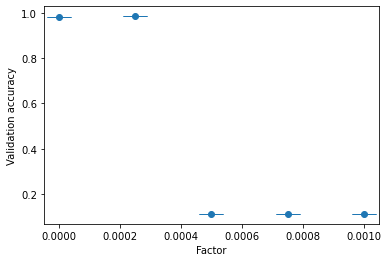

Our accuracy: 0.9844 Hilton: 0.9847


In [160]:
df = pd.DataFrame(scores, columns=["Test loss", "Test accuracy"])
val_accuracies = df["Test accuracy"]
mean = []
std = []

for i in range (5):
    mean.append(np.mean(val_accuracies[i*3:(i*3)+2]))
    std.append(np.std(val_accuracies[i*3:(i*3)+2]))

plt.scatter(factors, mean)
plt.xlabel("Factor")
plt.ylabel("Validation accuracy")
plt.errorbar(factors, mean, std, ls='None', markersize=10, capsize=12)
plt.show()

print("Our accuracy:", round(np.max(accuracies), 4), "Hilton:",0.9847)

### Question 4) Auto-Encoder for denoising


In [ ]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [ ]:

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))
